In [2]:
import pandas as pd      # type: ignore
import numpy as np          # type: ignore
import matplotlib.pyplot as plt         # type: ignore
import seaborn as sns           # type: ignore
import plotly.express as px         # type: ignore
from plotly.subplots import make_subplots           #type: ignore
from sklearn.model_selection import train_test_split            # type: ignore
from sklearn.linear_model import LogisticRegression         # type: ignore
from sklearn.metrics import classification_report           # type: ignore
from sklearn.preprocessing import StandardScaler        # type: ignore
from tensorflow import keras               # type: ignore
import tensorflow as tf             # type: ignore

In [3]:
df=pd.read_csv(r"C:\Users\moham\OneDrive\SUHAIB\SCHOOLWORK\GRADE 11\SCIENCE\COMPUTER SCIENCE\data\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.duplicated().sum()

0

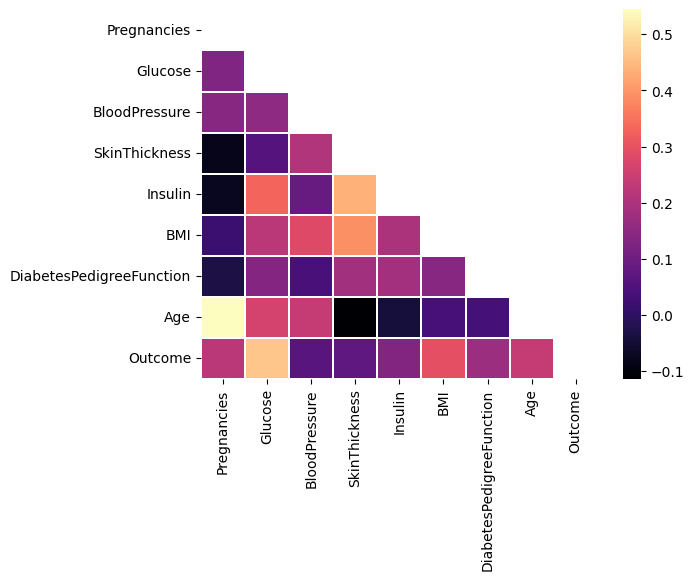

In [7]:
corr=df.corr()
mask=np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,linewidths=0.1,cmap='magma')
plt.show()

In [8]:
isnull=df.isnull().sum()

fig=px.imshow(isnull.to_frame(),color_continuous_scale='viridis',)

fig.update_layout(width=600)
fig.show()

In [9]:
def custom_boxplots(dataset,column_list,columns,suptitle):
    fig=make_subplots(rows=(len(column_list)//columns)+1,cols=columns,subplot_titles=column_list)
    fig.update_layout(height=1000,width=300*columns,title=suptitle)
    for i,data in enumerate(column_list):
        row=i//columns+1
        col=i%columns+1
        fig.add_trace(px.box(x=dataset[data]).data[0],row=row,col=col)
    fig.show()
custom_boxplots(df,['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],columns=3,suptitle="Boxplots for Diabetes Dataset")


In [10]:
def handle_ouliers_mean(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        iqr = Q3 - Q1
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr
        data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].mean(), data[col])
for i in range (4):     
    handle_ouliers_mean(df)


In [11]:
def custom_boxplots(dataset,column_list,columns,suptitle):
    fig=make_subplots(rows=(len(column_list)//columns)+1,cols=columns,subplot_titles=column_list)
    fig.update_layout(height=1000,width=300*columns,title=suptitle)
    for i,data in enumerate(column_list):
        row=i//columns+1
        col=i%columns+1
        fig.add_trace(px.box(x=dataset[data]).data[0],row=row,col=col)
    fig.show()
custom_boxplots(df,['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],columns=3,suptitle="Boxplots for Diabetes Dataset")


In [12]:
class epochcall(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print()
            print('Epoch: {:d}, '.format(epoch), end='')
            for name, value in sorted(logs.items()):
                print('{}:{:0.4f}'.format(name, value), end=', ')
            print()
        print('.', end='')

In [13]:
# Split data into features and target
scaler= StandardScaler()
X = df.to_numpy()[:,0:8] 
y= df.to_numpy()[:,8]
X=scaler.fit_transform(X)



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a logistic regression model using TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[epochcall()],verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')




Epoch: 0, accuracy:0.5260, loss:0.7632, val_accuracy:0.5260, val_loss:0.7675, 
6/6 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7396..............
Loss: 0.5781897306442261, Accuracy: 0.7395833134651184


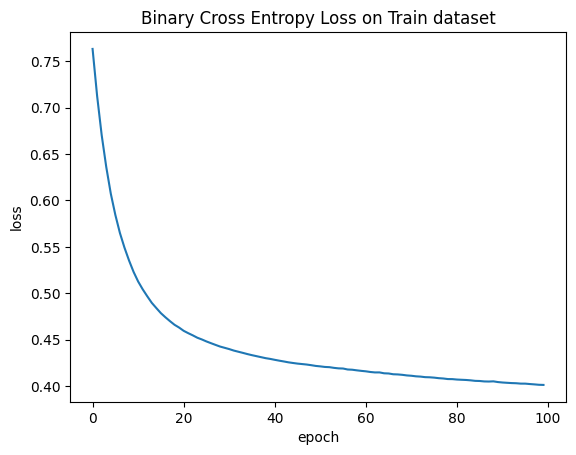

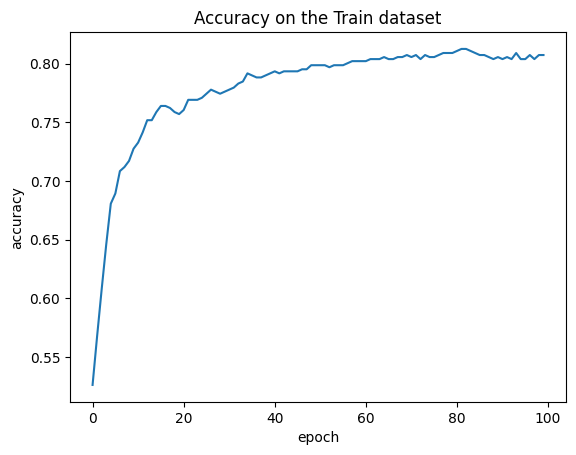

In [16]:
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the Train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [17]:
# Split the dataframe into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Calculate mean and standard deviation for each feature column
mean_values = X.mean(axis=0).values.reshape(1, -1)
std_values = X.std(axis=0).values.reshape(1, -1)

# Demo values for testing
pregnancies=eval(input('Enter Pregnancies'))
glucose = eval(input('Enter Glucose'))
blood_pressure = eval(input('Enter Blood pressure'))
skin_thickness = eval(input('Enter skin thickness'))
insulin = eval(input('Enter insulin'))
bmi = eval(input('Enter bmi'))
diabetes_pedigree_function = eval(input('Enter diabetes pedigree function'))
age = eval(input('Enter age'))

# Create a numpy array from the demo values
user_input = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]])
# Preprocess the user input using the mean and standard deviation
user_input_scaled = (user_input - mean_values) / std_values

# Make a prediction
prediction1=model.predict(user_input_scaled)
# Print the prediction
print('Prediction:',prediction1[0][0])

1/1 [==============================] - 0s 80ms/step
Prediction: 0.15837131
